V přiloženém excelu máte dvě tabulky. Jedna představuje transakce (objednávky), které proběhly v E-shopu. Druhá představuje databázi produktů v E-shopu.
Ke všem otázkám níže prosím popisujte i postup, jak jste k danému závěru došli. Pro analýzu a prezentaci výsledků využijte nástroje dle vaší volby.
Manager E-shopu se ptá:
1.	Na jaké kategorii produktů máme největší obrat? Mění se na tom v jednotlivých měsících něco?
2.	Který den v týdnu je nejsilnější na počet objednávek?
3.	Od 18. 3. 2022 došlo k navýšení budgetu na online marketingových platformách (Google Ads, Sklik, Facebook). Ovlivnilo to nějak prodeje? A pokud ano, tak jak? (externí vlivy zanedbejme)

Pokud něco ze zadání není jasné, tak se neváhejte zeptat.


In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from datetime import datetime

In [5]:
input_products = "./produkty.csv"
input_transactions = "./transakce.csv"

In [23]:
products_DF = pd.read_csv(input_products,sep = ";")
products_DF

,Product name,Category,Price
0,JBL Charge 4,Audio,2990
1,Bose QuietComfort Earbuds,Audio,7490
2,Sony WH-1000XM4,Audio,10490
3,LG OLED55CX,Televize,38990
4,Samsung QN55Q80T,Televize,29990
5,LG 75NANO81,Televize,44990
6,Apple iPhone 12 Pro,Mobilní telefony,27990
7,Samsung Galaxy S21 Ultra,Mobilní telefony,25490
8,Xiaomi Poco X3 Pro,Mobilní telefony,5690
9,Apple iPad Air,Tablety,17990


In [24]:
transactions_DF = pd.read_csv(input_transactions, sep = ";")
transactions_DF

,Transaction ID,Date,Product name,Quantity
0,1,01.02.2022,Samsung QN55Q80T,1
1,1,01.02.2022,Apple iPhone 12 Pro,1
2,2,02.02.2022,Lenovo Tab P11 Pro,2
3,2,02.02.2022,Xiaomi Poco X3 Pro,1
4,3,03.02.2022,Bose QuietComfort Earbuds,2
...,...,...,...,...
136,77,27.05.2022,LG 75NANO81,1
137,77,27.05.2022,Samsung Galaxy Tab S7+,1
138,78,29.05.2022,Bose QuietComfort Earbuds,2
139,78,29.05.2022,Apple iPhone 12 Pro,1


In [8]:
money_transactions_DF = transactions_DF.copy()

In [9]:
money_transactions_DF = money_transactions_DF.merge(products_DF, how="inner", on="Product name")

In [10]:
money_transactions_DF["Paid amount"] = money_transactions_DF["Price"]*money_transactions_DF["Quantity"]

In [14]:
money_transactions_DF["Date"] = pd.to_datetime(money_transactions_DF["Date"], format="%d.%m.%Y")
money_transactions_DF.sort_values(by="Date")


,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980
...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980


In [22]:
total_made_by_category_DF = money_transactions_DF.groupby("Category")["Paid amount"].sum()
total_made_by_category_DF

Category
Audio                416370
Mobilní telefony     614460
Tablety              623660
Televize            1205680
Name: Paid amount, dtype: int64

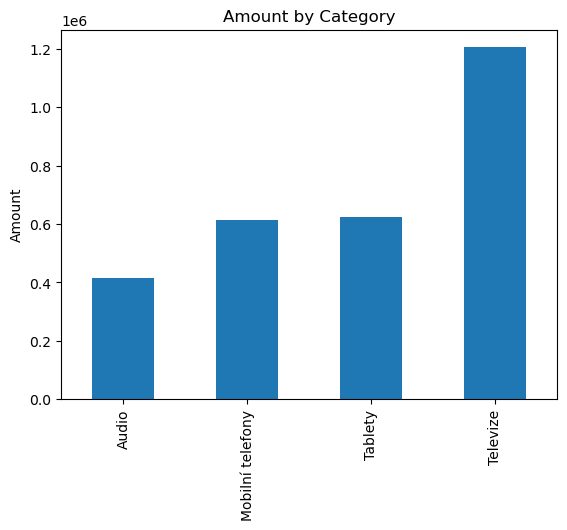

In [44]:
total_made_by_category_DF.plot.bar()

plt.xlabel(None)
plt.ylabel('Amount')
plt.title('Amount by Category')

plt.show()